In [1]:
!pip install yapf==0.31.0

distutils: /opt/conda/include/python3.8/UNKNOWN
sysconfig: /opt/conda/include/python3.8
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
distutils: /home/appuser/.local/include/python3.8/UNKNOWN
sysconfig: /home/appuser/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/opt/conda/bin/python3.8 -m pip install --upgrade pip' command.


In [10]:
from pathlib import Path

# from piglegcv.incision.mmdetection_custom_dataset_detection import mmdetection_path
# from piglegcv.incision_detection_mmdet import mmdetection_path

In [11]:
paths = Path("../piglegcv/resources/incision_detection_models").glob("*.pth")
checkpoint_file = list(paths)[0]
checkpoint_file


PosixPath('../piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth')

In [12]:
# turn pth into onnx
import torch
import torch.onnx
from torch.autograd import Variable
import torchvision
import torchvision.models as models

In [13]:

import torch
import torch.onnx

from mmcv import Config
from mmdet.apis import (
    inference_detector,
    init_detector,
    set_random_seed,
    show_result_pyplot,
    train_detector,
)


# from your_model_file import YourModelClass  # Replace with your model's import


In [14]:

# Load the model architecture and weights
# model = YourModelClass()             # Initialize your model
# model.load_state_dict(torch.load(str(checkpoint_file), map_location=torch.device('cpu')))
# model.eval()                         # Set the model to evaluation mode
#
# # Create a dummy input tensor with the appropriate dimensions (e.g., batch_size=1, channels=3, height=224, width=224)
# dummy_input = torch.randn(1, 3, 224, 224)
#
# # Export the model to ONNX format
# torch.onnx.export(
#     model,                          # model being run
#     dummy_input,                    # model input (or a tuple for multiple inputs)
#     "model.onnx",                   # where to save the model (can be a file or file-like object)
#     export_params=True,             # store the trained parameter weights inside the model file
#     opset_version=11,               # the ONNX version to export the model to
#     do_constant_folding=True,       # whether to execute constant folding for optimization
#     input_names=['input'],          # the model's input names
#     output_names=['output'],        # the model's output names
#     dynamic_axes={'input': {0: 'batch_size'},  # variable length axes
#                   'output': {0: 'batch_size'}}
# )

# print("Model has been converted to ONNX format and saved as model.onnx")


In [15]:

mmdetection_path = Path("~/mmdetection/").expanduser()
assert mmdetection_path.exists()

config_file = mmdetection_path / 'configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py'
assert config_file.exists()


In [16]:
uploads_path = Path("/webapps/piglegsurgery/piglegsurgeryweb/media/upload/")
data_path = list(uploads_path.glob("**/EKN_6_CBA.mp4.jpg"))[0]
assert data_path.exists()

In [17]:

import torch
from mmdet.apis import init_detector, inference_detector
from mmcv import Config

# Define paths to your config file and checkpoint
# checkpoint_file = 'path/to/your/checkpoint.pth'

cfg = Config.fromfile(
    mmdetection_path
    / "configs/faster_rcnn/faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py"
)

cfg.dataset_type = "CocoDataset"
# cfg.data_root = str(local_input_data_dir)
cfg.classes = ("incision",)
# modify num classes of the model in box head
cfg.model.roi_head.bbox_head.num_classes = 1
# Build and initialize the model

# device='cuda:0'
device="cpu"
model = init_detector(cfg, str(checkpoint_file), device=device)
model.eval()  # Ensure the model is in evaluation mode


load checkpoint from local path: ../piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth


FasterRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [18]:
my_config = Path("incision_faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py")
cfg.dump(str(my_config))

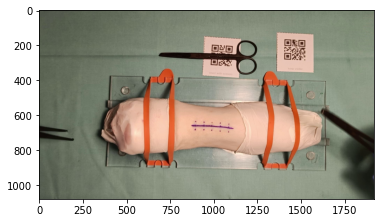

In [19]:

import mmcv
from matplotlib import pyplot as plt
img = mmcv.imread(str(data_path))
plt.imshow(mmcv.bgr2rgb(img))


/home/appuser/mmdetection/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


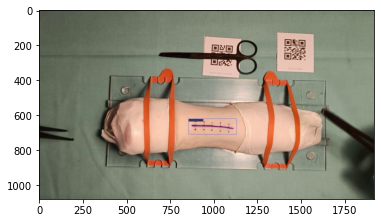

In [20]:

result = inference_detector(model, img)
img_result = model.show_result(
    img, result,
    # out_file=local_output_data_dir / f"incision_full.jpg"
)  # save image with result
plt.imshow(mmcv.bgr2rgb(img_result))
plt.show()


In [43]:
CONFIG_STR = str(my_config)
CHECKPOINT_STR = str(checkpoint_file)
MODEL_ONNX = my_config.with_suffix(".onnx")
MODEL_ONNX_DYNAMIC_AXES = my_config.with_suffix(".dynamic_axes.onnx")
print(f"{CONFIG_STR=}")
!echo $CONFIG_STR

print(f"{MODEL_ONNX=}")


CONFIG_STR='incision_faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py'
incision_faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.py
MODEL_ONNX=PosixPath('incision_faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.onnx')


In [46]:
!python ~/mmdetection/tools/deployment/pytorch2onnx.py

usage: pytorch2onnx.py [-h] [--input-img INPUT_IMG] [--show]
                       [--output-file OUTPUT_FILE]
                       [--opset-version OPSET_VERSION] [--test-img TEST_IMG]
                       [--dataset DATASET] [--verify] [--simplify]
                       [--shape SHAPE [SHAPE ...]] [--mean MEAN [MEAN ...]]
                       [--std STD [STD ...]]
                       [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
                       [--dynamic-export] [--skip-postprocess]
                       config checkpoint
pytorch2onnx.py: error: the following arguments are required: config, checkpoint


In [44]:
!python ~/mmdetection/tools/deployment/pytorch2onnx.py --output-file $MODEL_ONNX $CONFIG_STR $CHECKPOINT_STR

/home/appuser/mmdetection/tools/deployment/pytorch2onnx.py:297: UserWarning: Arguments like `--mean`, `--std`, `--dataset` would be         parsed directly from config file and are deprecated and         will be removed in future releases.
  warnings.warn('Arguments like `--mean`, `--std`, `--dataset` would be \
/home/appuser/mmcv/mmcv/onnx/symbolic.py:481: UserWarning: DeprecationWarning: This function will be deprecated in future. Welcome to use the unified model deployment toolbox MMDeploy: https://github.com/open-mmlab/mmdeploy
  warnings.warn(msg)
load checkpoint from local path: ../piglegcv/resources/incision_detection_models/220326_234659_mmdet.pth
/opt/conda/lib/python3.8/site-packages/torch/nn/modules/module.py:1402: UserWarning: positional arguments and argument "destination" are deprecated. nn.Module.state_dict will not accept them in the future. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(
/

In [45]:
!ls *.onnx

incision_faster_rcnn_r50_caffe_fpn_mstrain_1x_coco.onnx  model.onnx


# Read the onnx model and run inference


In [50]:

import onnxruntime as ort
import numpy as np


In [54]:

# Specify the path to your ONNX model
model_path = MODEL_ONNX

# Create an inference session with the ONNX model
session = ort.InferenceSession(model_path)

# Get input details from the model
input_name = session.get_inputs()[0].name
input_shape = session.get_inputs()[0].shape
print("Input Name:", input_name)
print("Input Shape:", input_shape)

# Create a dummy input (adjust dimensions if necessary)
# Example: if input_shape is [1, 3, 800, 1333]
# dummy_input = np.random.randn(*input_shape).astype(np.float32)
img = mmcv.imread(str(data_path))
# resize the image to the input shape of the model
img = mmcv.imresize(img, (input_shape[3], input_shape[2]))
# now the image shape is (H, W, C)
# we need to transpose it to (C, H, W) and add a batch dimension
dummy_input = img.transpose(2, 0, 1)
dummy_input = np.expand_dims(dummy_input, axis=0)
dummy_input = dummy_input.astype(np.float32)


# Run inference; the second argument is a dictionary mapping input names to data
outputs = session.run(None, {input_name: dummy_input})

# Print the outputs
for idx, output in enumerate(outputs):
    print(f"Output {idx}:")
    print(output)



Input Name: input
Input Shape: [1, 3, 800, 1216]
Output 0:
[[[ 5.4344873e+02  4.6968216e+02  7.0681177e+02  5.1871674e+02
    6.9109201e-02]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.0000000e+00 -1.0000000e+00
    0.0000000e+00]
  [-1.0000000e+00 -1.0000000e+00 -1.000

len(outputs)=2
detections.shape=(100, 5)
valid_detections=array([[5.43000000e+02, 4.69000000e+02, 7.06000000e+02, 5.18000000e+02,
        6.91092014e-02]])
det=array([5.43000000e+02, 4.69000000e+02, 7.06000000e+02, 5.18000000e+02,
       6.91092014e-02])


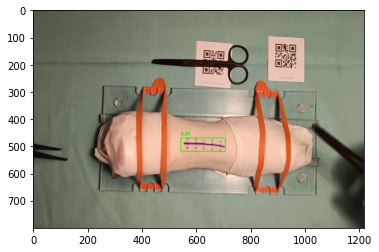

In [65]:
import cv2
import numpy as np
import mmcv

print(f"{len(outputs)=}")
# Assume `outputs` was produced by your ONNX inference
# For a single image, get the detections from the first batch element:
detections = outputs[0][0]  # shape: (num_detections, 5)
print(f"{detections.shape=}")

# Set a confidence threshold (adjust as needed)
confidence_threshold = 0.01

# Initialize a list for valid detections
valid_detections = []

# Loop over each detection
for bbox in detections:
    x1, y1, x2, y2, score = bbox
    # Filter out invalid detections: typically placeholders are marked with -1 or very low scores
    if score > confidence_threshold:
        valid_detections.append([int(x1), int(y1), int(x2), int(y2), score])

# Convert the list to a NumPy array (if there are any valid detections)
valid_detections = np.array(valid_detections) if valid_detections else None
print(f"{valid_detections=}")

# Copy the image to draw on it (note: `img` is already resized to the model's input dimensions)
img_draw = img.copy()

if valid_detections is not None and len(valid_detections) > 0:
    for det in valid_detections:
        print(f"{det=}")
        x1, y1, x2, y2, score = det
        # Draw the bounding box
        cv2.rectangle(img_draw, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)
        # Put the confidence score on the top-left corner of the bounding box
        cv2.putText(img_draw, f"{score:.2f}", (int(x1), max(int(y1) - 10, 0)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
else:
    print("No valid detections above the threshold.")

# Display the image with drawn bounding boxes
# mmcv.imshow(img_draw, "Detection", wait_time=0)
plt.imshow(mmcv.bgr2rgb(img_draw))
plt.show()

